In [6]:
pip install Augmentor

In [7]:
import cv2
from matplotlib import pyplot as plt
import glob
import os
import random
import Augmentor
import dlib
from tqdm import tqdm

In [8]:
def read_image(image_path):
    img = cv2.imread(image_path)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    hog_face_detector = dlib.get_frontal_face_detector()
    faces_hog= hog_face_detector(img, 1)
    
    if len(faces_hog) == 1:
        x = faces_hog[0].left()
        y = faces_hog[0].top()
        w = faces_hog[0].right() - x
        h = faces_hog[0].bottom() - y
    
        img = cv2.resize(img[y:y+h, x:x+w], (221, 221))
        return img

#     print(image_path, len(faces_hog))
        
    return None

In [ ]:
# people = ["HA", "Thinh", "Tung", "Son"]

In [ ]:
# for person in people:
#     path_to_data = "/home/pham.hoang.anh/prj/face_detect/data/crop_image/train/" + person
#     p = Augmentor.Pipeline(path_to_data, output_directory="/home/pham.hoang.anh/prj/face_detect/data/crop_image/train/" + person)
#     p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
#     p.flip_left_right(probability=0.5)
#     p.flip_top_bottom(probability=0.5)
#     p.random_erasing(probability=0.5, rectangle_area=0.3)
#     p.sample(100)

In [ ]:
# for person in people:
#     path_to_data = "/home/pham.hoang.anh/prj/face_detect/data/crop_image/val/" + person
#     p = Augmentor.Pipeline(path_to_data, output_directory="/home/pham.hoang.anh/prj/face_detect/data/crop_image/val/" + person)
#     p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
#     p.flip_left_right(probability=0.5)
#     p.flip_top_bottom(probability=0.5)
#     p.random_erasing(probability=0.5, rectangle_area=0.3)
#     p.sample(20)

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/
# try:
#   files = glob.glob(f"/content/drive/MyDrive/Training_Model/*.jpg")
#   for file in files:  
#     print(file)
# except NameError:
#   print(NameError)
  

In [23]:
images = []
labels = []
names = []
count = 0

# with open('drive/My Drive/Machine_Learning-prj/face_detection/X_train_triplet.pkl', 'rb') as files_drive
# for path, dirs, files in files_drive:
for path, dirs, files in os.walk('/content/drive/MyDrive/Training_Model/'):
        for d in tqdm(dirs):
            class_image = []
            for ext in ('JPG', 'jpeg', 'png'):
                for f in glob.glob(os.path.join(path, d, '*.' + ext)):
                    try:
                        print(f)
                        img = read_image(f)
                    except NameError:
                        print(NameError)
                        continue
                    if img is None:
                        continue
                    class_image.append(img)
                    
            if len(class_image) > 1:
                names.append(d)
                for img in class_image:
                    images.append(img)
                    labels.append(count)
                count += 1

# images, labels = shuffle(images, labels, random_state=0)

  0%|          | 0/4 [00:00<?, ?it/s]

/content/drive/MyDrive/Training_Model/Ngo_Minh_Thang/IMG_9655.JPG
/content/drive/MyDrive/Training_Model/Ngo_Minh_Thang/IMG_9656.JPG
/content/drive/MyDrive/Training_Model/Ngo_Minh_Thang/IMG_9684.JPG
/content/drive/MyDrive/Training_Model/Ngo_Minh_Thang/IMG_9687.JPG
/content/drive/MyDrive/Training_Model/Ngo_Minh_Thang/IMG_9689.JPG


 25%|██▌       | 1/4 [01:28<04:26, 88.94s/it]

/content/drive/MyDrive/Training_Model/Nguyen_Minh_Nhat/IMG_9570.JPG


 50%|█████     | 2/4 [01:45<02:14, 67.25s/it]

/content/drive/MyDrive/Training_Model/Bui_Huu_Dat/IMG_9673.JPG
/content/drive/MyDrive/Training_Model/Bui_Huu_Dat/IMG_9678.JPG
/content/drive/MyDrive/Training_Model/Bui_Huu_Dat/IMG_9680.JPG
/content/drive/MyDrive/Training_Model/Bui_Huu_Dat/IMG_9742.JPG
/content/drive/MyDrive/Training_Model/Bui_Huu_Dat/IMG_9764.JPG


100%|██████████| 4/4 [03:07<00:00, 46.96s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


nếu kích thước images lơn hơn 0 thì import ảnh thành công

In [24]:
import numpy as np
np.shape(images), len(labels), len(names)

((7, 221, 221, 3), 7, 2)

In [26]:
import pickle

with open('X_train_triplet.pkl', 'wb') as f:
    pickle.dump(images, f)
with open('y_train_triplet.pkl', 'wb') as f:
    pickle.dump(labels, f)
with open('name_map.pkl', 'wb') as f:
    pickle.dump(names, f)

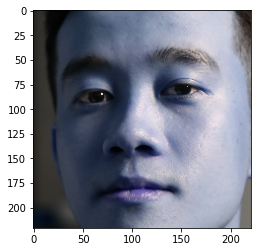

In [39]:
from matplotlib import pyplot as plt
plt.imshow(images[1])

In [42]:
np.where(np.array(names) == 'IM')

(array([], dtype=int64),)

In [43]:
np.where(np.array(labels) == 1500)

(array([], dtype=int64),)